In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd

df_balanced = pd.read_csv("data/Preprocessed_dataset.csv")
scaled_cols = ['ammonia','biochemical_oxygen_demand','dissolved_oxygen',
               'orthophosphate','ph','temperature','nitrogen','nitrate']

X = df_balanced[scaled_cols]  # fitur numerik sudah discale
y = df_balanced['label']      # label encoded

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2915
           1       1.00      0.99      1.00       173
           2       1.00      1.00      1.00      1968
           3       0.99      1.00      0.99        74

    accuracy                           1.00      5130
   macro avg       1.00      1.00      1.00      5130
weighted avg       1.00      1.00      1.00      5130



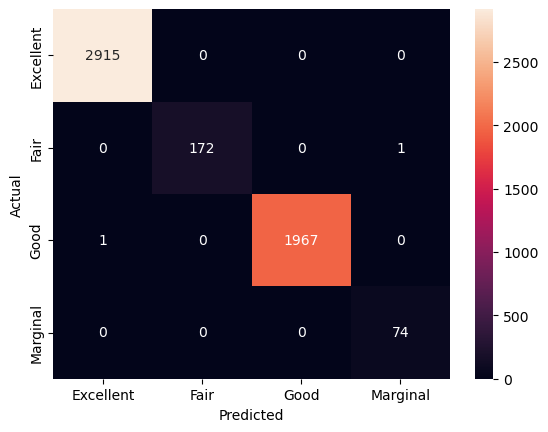

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

le = joblib.load('notebooks/label_encoder.pkl')
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
